In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataframe.csv')
df_all_timestamps = pd.read_csv('dataframe_all_timestamps.csv')

In [3]:
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [4]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)

#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [6]:
# df has the final numbers for the trending video

df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,9.877554,7.375882,3.178054,5.375278,2017-11-12 17:58:57
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,9.940061,6.940222,6.326149,5.497168,2017-11-12 13:46:18
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,12.242660,7.255591,5.003946,4.510860,2017-11-12 19:08:08
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,9.674074,4.962845,2.397895,2.079442,2017-11-13 19:58:33
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,11.518987,7.056175,3.891820,3.583519,2017-11-13 13:33:26


In [ ]:
df_all_timestamps.info()

# has more data than df, has each video for every day it appeared

In [ ]:
df['tags'].str.split('|')

In [ ]:
#shows the amount of views each category gets across all countries

sns.set(rc={'figure.figsize':(30,8)})
ax = sns.barplot(x="category", y="views", data=df)

In [ ]:
#box plot the amount of views each category gets across all countries, but without logviews:

# sns.set(rc={'figure.figsize':(32,17)})
# ax = sns.boxplot(x="category", y="views", data=df_all_timestamps)

#more readable box plot the amount of views each category gets across all countries, in df


sns.set(rc={'figure.figsize':(32,17)})
ax = sns.boxplot(x="category", y="log_views", data=df)

In [ ]:
#same as previous cell, with df_all_timestamps and trying out y-lim 

plt.ylim(0, 1000000)
sns.set(rc={'figure.figsize':(32,17)})
ax = sns.boxplot(x="category", y="views", data=df_all_timestamps)

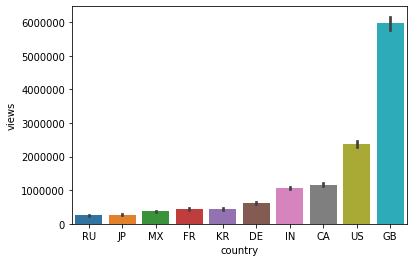

In [8]:
# the above graph, sorted from fewest views to the highest

ax = sns.barplot(x="country", y="views", data= df_all_timestamps, 
order=["RU","JP","MX","FR","KR","DE","IN","CA","US","GB"])

In [ ]:
# sorted from fewest views to highest, in df, with a y limiter

plt.ylim(0, 1000000)
# sns.set_palette("colorblind") 
ax = sns.barplot(x="country", y="views", data=df, order=["JP","FR","RU","MX","DE","KR","CA","IN","US","GB"])

In [ ]:
# views per country, with the categories as different colors for each country

sns.set(rc={'figure.figsize':(32,20)})
ax = sns.barplot(x="country", y="views", hue="category", data=df)

In [ ]:
# log views per country, with the categories as different colors for each country

sns.barplot( x=df["country"], y=df["log_views"], hue=df["category"])

In [ ]:
df.info()

In [ ]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['country','log_views']).count()['category'].unstack().plot(ax=ax)

In [ ]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['trending_date','category']).count()['views'].unstack().plot(ax=ax)
#should be the amount of views per category on each date

In [ ]:
df.groupby(['category']).groups.keys()

In [ ]:
# df[df.category = 'Entertainment', 'Comedy' or 'People & Blogs', 'News & Politics', 'Sports']

# len(df.groupby(['category']).groups['Entertainment'])         # 50468 #1
# len(df.groupby(['category']).groups['People & Blogs'])        # 28045 #2 
# len(df.groupby(['category']).groups['News & Politics'])       # 20327 #3
# len(df.groupby(['category']).groups['Sports'])                # 12561 #4 
# len(df.groupby(['category']).groups['Comedy'])                # 10358 #5
# len(df.groupby(['category']).groups['Music'])                 # 10145 #6
# len(df.groupby(['category']).groups['Howto & Style'])         # 9580  #7
# len(df.groupby(['category']).groups['Film & Animation'])      # 8460  #8
# len(df.groupby(['category']).groups['Gaming'])                # 5318  #9  
# len(df.groupby(['category']).groups['Education'])             # 3897  #10
# len(df.groupby(['category']).groups['Science & Technology'])  # 3404  #11
# len(df.groupby(['category']).groups['Autos & Vehicles'])      # 3274  #12
# len(df.groupby(['category']).groups['Pets & Animals'])        # 2271  #13  
# len(df.groupby(['category']).groups['Nonprofits & Activism']) # 1779  #14
# len(df.groupby(['category']).groups['Travel & Events'])       # 812   #15
# len(df.groupby(['category']).groups['Shows'])                 # 435   #16
# len(df.groupby(['category']).groups['Movies'])                # 12    #17
# len(df.groupby(['category']).groups['Trailers'])              # 3     #18

# all together add up to the keys, nothing broken or no duplicates

len(df.category.keys()) # 171149

In [ ]:
# Remaking df with less columns

small_view = df[["views", "country", "trending_date", "publish_timestamp"]]
# small_view.head()

In [ ]:
# Remaking df_all_timestamps with less columns

small_view_all = df_all_timestamps[["views", "country", "trending_date", "publish_timestamp"]]
# small_view_all.head()

In [ ]:
# Using the smaller dataframe to sort out just the videos from the US

US_bool = df.country == 'US'

US_trending= small_view.loc[US_bool]
# US_trending.head()

In [ ]:
# Remaking df_all_timestamps with less columns

US_bool_all = df_all_timestamps.country == 'US'

US_trending_all= small_view_all.loc[US_bool_all]
# US_trending_all.head()

In [ ]:
# Same amount as df trending keys = #205
# US_trending_all.groupby(['trending_date']).groups.keys()
# len(US_trending_all.groupby(['trending_date']).groups.keys())

US_trending_all.groupby(['trending_date']).groups.keys()

In [ ]:
# US_trending.groupby(['trending_date']).groups['2017-11-15']
# US_trending.groupby(['trending_date']).groups['2017-12-15']
# len(US_trending.groupby(['trending_date']).groups['2017-11-15']) #36
# len(US_trending.groupby(['trending_date']).groups['2017-12-15']) #42

# Trying to figure out how to group all different timestamps to see the counts of each one without typing out 205 
# length statements

# US_trending.groupby(['trending_date']).size()

US_trending_all.groupby(['trending_date']).size().reset_index(name='counts')

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
US_trending.groupby(['publish_time']).size().reset_index(name='counts').plot(ax=ax)

In [7]:
US_trending.groupby(['publish_time']).size().reset_index(name='counts')

NameError: name 'US_trending' is not defined

In [ ]:
df_all_timestamps.loc[:,'newtrending_date'] = \
                pd.to_datetime(df_all_timestamps['trending_date'],
                                infer_datetime_format=True,
                                errors='coerce')